# imports

In [1]:
import pandas as pd
import seaborn as sns

# Create DataFrame

In [2]:
%load_ext amazon_sagemaker_sql_magic

In [4]:
%%sm_sql --connection-properties '{"connection_type":"ATHENA","work_group":"primary"}' --output '{"format": "DATAFRAME", "dataframe_name": "training_df"}'


-- Query to list columns in table 'AwsDataCatalog.fare-prediction.raw'
SELECT
  *
FROM
  "AwsDataCatalog"."fare-prediction"."raw"

Saved results to training_df


In [6]:
print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.head(200)

Read dataset completed successfully.
Total number of rows: 1000




,trip_start_timestamp,trip_end_timestamp,trip_start_hour,trip_seconds,trip_miles,trip_speed,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tip_rate,tolls,extras,trip_total,payment_type,company
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,05/17/2022 5:45:00 PM,05/17/2022 6:00:00 PM,17.75,821,1.13,5.0,1.703108e+10,1.703108e+10,8.0,8.0,9.00,2.06,22.9,0,0.0,11.06,Mobile,Blue Ribbon Taxi Association
196,05/17/2022 11:45:00 PM,05/17/2022 11:45:00 PM,23.75,414,0.57,5.0,NaN,NaN,32.0,32.0,6.00,0.00,0.0,0,0.0,6.00,Cash,Flash Cab
197,05/17/2022 3:45:00 PM,05/17/2022 4:00:00 PM,15.75,886,1.22,5.0,1.703108e+10,1.703184e+10,8.0,8.0,9.00,0.00,0.0,0,0.0,9.00,Cash,City Service
198,05/17/2022 5:00:00 PM,05/17/2022 5:15:00 PM,17.00,1219,1.68,5.0,1.703183e+10,1.703108e+10,28.0,8.0,9.00,2.07,23.0,0,0.0,11.07,Mobile,Sun Taxi


# Visualize Relationships in Dataset

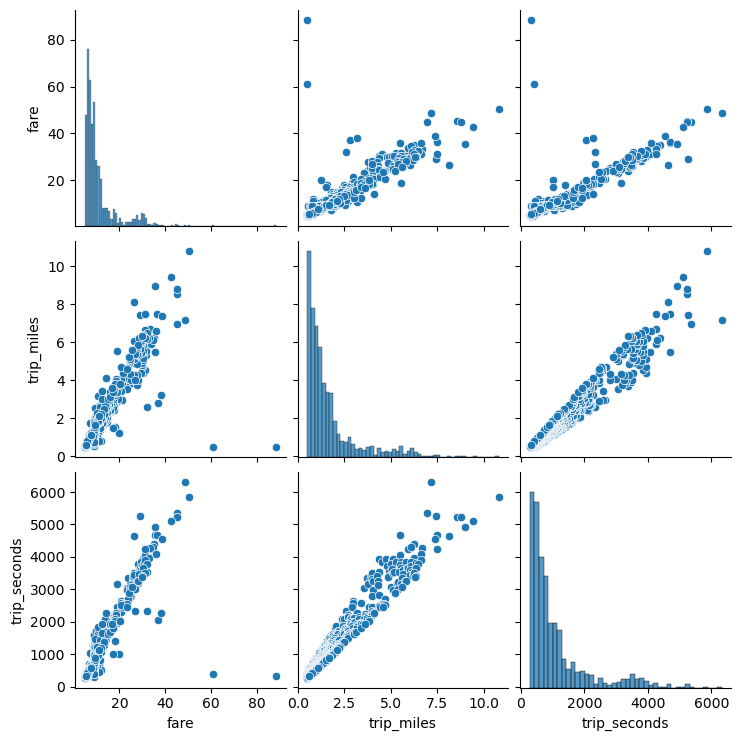

In [7]:
sns.pairplot(
    training_df,
    x_vars=["fare", "trip_miles", "trip_seconds"],
    y_vars=["fare", "trip_miles", "trip_seconds"]
)